### Step 1 : Importing modules and  Understanding Data 

In [2]:
import numpy as np
import nibabel as nib
import glob
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave



ModuleNotFoundError: No module named 'numpy'

In [1]:
import os
import nibabel as nib
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Path to the directory containing the images
TRAIN_DATASET_PATH = r"C:\Users\rahul\Documents\proxmedlpu\train\images"

# Load the NIfTI image using nibabel
image_filename = "Anon1.nii.gz"
image_path = os.path.join(TRAIN_DATASET_PATH, image_filename)
test_image_flair = nib.load(image_path).get_fdata()

# Print the maximum value in the image
print(test_image_flair.max())

ModuleNotFoundError: No module named 'nibabel'

In [24]:
#understaing the single image and applying minmax scaler 

#load image 
test_image_t2 = nib.load(os.path.join(TRAIN_DATASET_PATH, r"C:\Users\rahul\Documents\proxmedlpu\train\images\Anon1.nii.gz")).get_fdata()
test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

# load mask image 
test_mask = nib.load(os.path.join(TRAIN_DATASET_PATH, r"C:\Users\rahul\Documents\proxmedlpu\train\mask\Anon1_ROI.nii.gz")).get_fdata()
test_mask = test_mask.astype(np.uint8)

FileNotFoundError: No such file or no access: 'C:\Users\rahul\Documents\proxmedlpu\train\images\Anon1.nii.gz'

In [25]:
print(test_image_t2.max())
# with minmax scaler , min value is 0 and max value is 1 by default 
test_image_t2.shape

1.0


(512, 512, 662)

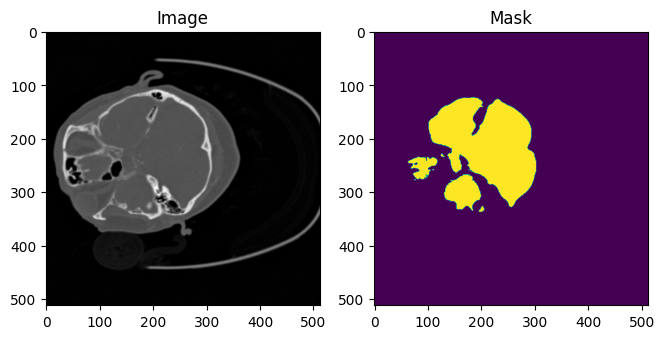

In [6]:
import random
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [7]:
test_mask.shape

(512, 512, 662)

In [8]:
# Original image size: (512, 512, 662)
original_image = test_mask

# Target cropped size: (128, 128, 128)
target_size = (128, 128, 128)

# Calculate the starting indices for cropping
start_x = (original_image.shape[0] - target_size[0]) // 2
start_y = (original_image.shape[1] - target_size[1]) // 2
start_z = (original_image.shape[2] - target_size[2]) // 2

# Perform cropping
cropped_mask_image = original_image[start_x:start_x+target_size[0], start_y:start_y+target_size[1], start_z:start_z+target_size[2]]


In [9]:
cropped_mask_image.shape

(128, 128, 128)

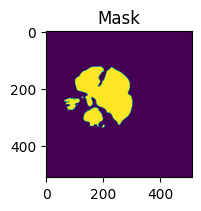

In [10]:
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [11]:
np.save(r'C:\Users\rahul\Documents\proxmedlpu\Anon2_ROI.npy', cropped_mask_image)

#Verify image is being read properly
#my_img=imread('BraTS2020_TrainingData/combined255.tif')

my_img=np.load(r'C:\Users\rahul\Documents\proxmedlpu\Anon2_ROI.npy')

### 2nd test

In [35]:
image_list = glob.glob(r"C:\Users\rahul\Documents\proxmedlpu\train\images")
mask_list = glob.glob(r"C:\Users\rahul\Documents\proxmedlpu\train\mask")

In [37]:
test_image_t2 = nib.load(os.path.join(TRAIN_DATASET_PATH, r"C:\Users\rahul\Documents\proxmedlpu\train\images\Anon5.nii.gz")).get_fdata()
test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

# load mask image 
test_mask = nib.load(os.path.join(TRAIN_DATASET_PATH, r"C:\Users\rahul\Documents\proxmedlpu\train\mask\Anon5_ROI.nii.gz")).get_fdata()
test_mask = test_mask.astype(np.uint8)

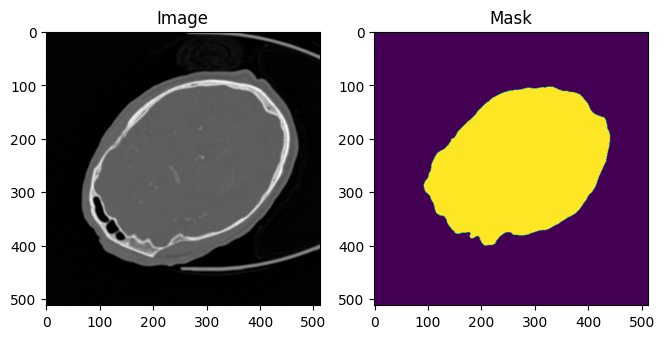

In [39]:
import random
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [40]:
# Original image size: (512, 512, 662)
original_image = test_mask

# Target cropped size: (128, 128, 128)
target_size = (128, 128, 128)

# Calculate the starting indices for cropping
start_x = (original_image.shape[0] - target_size[0]) // 2
start_y = (original_image.shape[1] - target_size[1]) // 2
start_z = (original_image.shape[2] - target_size[2]) // 2

# Perform cropping
cropped_mask_image = original_image[start_x:start_x+target_size[0], start_y:start_y+target_size[1], start_z:start_z+target_size[2]]


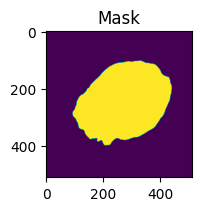

In [43]:
cropped_mask_image.shape
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [44]:
np.save(r'C:\Users\rahul\Documents\proxmedlpu\Anon5_ROI.npy', cropped_mask_image)

#Verify image is being read properly
#my_img=imread('BraTS2020_TrainingData/combined255.tif')

my_img=np.load(r'C:\Users\rahul\Documents\proxmedlpu\Anon5_ROI.npy')

### step2: preprocessing whole data 

In [12]:
import glob

# Create a list of image paths
image_list = sorted(glob.glob(r"C:\Users\rahul\Documents\proxmedlpu\train\images\*"))

# Create a list of mask paths
mask_list = sorted(glob.glob(r"C:\Users\rahul\Documents\proxmedlpu\train\mask\*"))

# Verify the contents of the lists
print("Image List:", image_list)
print("Mask List:", mask_list)


Image List: ['C:\\Users\\rahul\\Documents\\proxmedlpu\\train\\images\\Anon1.nii.gz', 'C:\\Users\\rahul\\Documents\\proxmedlpu\\train\\images\\Anon10.nii.gz', 'C:\\Users\\rahul\\Documents\\proxmedlpu\\train\\images\\Anon2.nii.gz', 'C:\\Users\\rahul\\Documents\\proxmedlpu\\train\\images\\Anon3.nii.gz', 'C:\\Users\\rahul\\Documents\\proxmedlpu\\train\\images\\Anon4.nii.gz', 'C:\\Users\\rahul\\Documents\\proxmedlpu\\train\\images\\Anon5.nii.gz', 'C:\\Users\\rahul\\Documents\\proxmedlpu\\train\\images\\Anon6.nii.gz', 'C:\\Users\\rahul\\Documents\\proxmedlpu\\train\\images\\N001.nii.gz', 'C:\\Users\\rahul\\Documents\\proxmedlpu\\train\\images\\N002.nii.gz', 'C:\\Users\\rahul\\Documents\\proxmedlpu\\train\\images\\N003.nii.gz', 'C:\\Users\\rahul\\Documents\\proxmedlpu\\train\\images\\N004.nii.gz', 'C:\\Users\\rahul\\Documents\\proxmedlpu\\train\\images\\N024.nii.gz', 'C:\\Users\\rahul\\Documents\\proxmedlpu\\train\\images\\N028.nii.gz', 'C:\\Users\\rahul\\Documents\\proxmedlpu\\train\\images\

In [15]:

"""#for img in range(len(image_list)):   #Using t1_list as all lists are of same size
    #print("Now preparing image and masks number: ", img)
      
    temp_image3=nib.load(image_list[img]).get_fdata()
    temp_image3=scaler.fit_transform(temp_image3.reshape(-1, temp_image3.shape[-1])).reshape(temp_image3.shape)

        
    temp_mask3=nib.load(mask_list[img]).get_fdata()
    temp_mask3=temp_mask3.astype(np.uint8)"""

'#for img in range(len(image_list)):   #Using t1_list as all lists are of same size\n    #print("Now preparing image and masks number: ", img)\n      \n    temp_image3=nib.load(image_list[img]).get_fdata()\n    temp_image3=scaler.fit_transform(temp_image3.reshape(-1, temp_image3.shape[-1])).reshape(temp_image3.shape)\n\n        \n    temp_mask3=nib.load(mask_list[img]).get_fdata()\n    temp_mask3=temp_mask3.astype(np.uint8)'

In [14]:
for img in range(len(image_list)):   #Using t1_list as all lists are of same size
    print("Now preparing image and masks number: ", img)
      
    temp_image=nib.load(image_list[img]).get_fdata()
    temp_image=scaler.fit_transform(temp_image.reshape(-1, temp_image.shape[-1])).reshape(temp_image.shape)

        
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)

    original_image = temp_image
    original_mask = temp_mask # Replace with your actual image data

# Target cropped size: (128, 128, 128)
    target_size = (128, 128, 128)

# Calculate the starting indices for cropping
    start_x = (original_image.shape[0] - target_size[0]) // 2
    start_y = (original_image.shape[1] - target_size[1]) // 2
    start_z = (original_image.shape[2] - target_size[2]) // 2

    start_x = (original_mask.shape[0] - target_size[0]) // 2
    start_y = (original_mask.shape[1] - target_size[1]) // 2
    start_z = (original_mask.shape[2] - target_size[2]) // 2

# Perform cropping for image
    temp_image = original_image[start_x:start_x+target_size[0], start_y:start_y+target_size[1], start_z:start_z+target_size[2]]

# Perform cropping for mask (assuming 'temp_mask' is defined)
    temp_mask = original_mask[start_x:start_x+target_size[0], start_y:start_y+target_size[1], start_z:start_z+target_size[2]]

    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 1% useful volume with labels that are not 0
        print("Save Me")
        np.save(r'C:\Users\rahul\Documents\proxmedlpu\train\temp_images\image_'+str(img)+'.npy', temp_image)
        np.save(r'C:\Users\rahul\Documents\proxmedlpu\train\temp_mask\mask_'+str(img)+'.npy', temp_mask)
        
    else:
        print("I am useless")    

Now preparing image and masks number:  0
Save Me
Now preparing image and masks number:  1
Save Me
Now preparing image and masks number:  2
Save Me
Now preparing image and masks number:  3
I am useless
Now preparing image and masks number:  4
I am useless
Now preparing image and masks number:  5
Save Me
Now preparing image and masks number:  6
Save Me
Now preparing image and masks number:  7
Save Me
Now preparing image and masks number:  8
Save Me
Now preparing image and masks number:  9
Save Me
Now preparing image and masks number:  10
I am useless
Now preparing image and masks number:  11
Save Me
Now preparing image and masks number:  12
Save Me
Now preparing image and masks number:  13
Save Me
Now preparing image and masks number:  14
Save Me
Now preparing image and masks number:  15
Save Me
Now preparing image and masks number:  16
I am useless
Now preparing image and masks number:  17
Save Me
Now preparing image and masks number:  18
Save Me
Now preparing image and masks number:  1

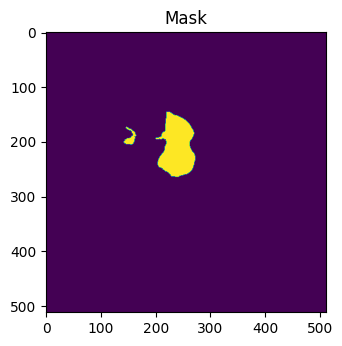

In [18]:
import random
n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))


plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [21]:
import splitfolders  # or import split_folders

input_folder = r"C:\Users\rahul\Documents\proxmedlpu\train" 
output_folder = r"C:\Users\rahul\Documents\proxmedlpu\trainingdata"
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None)

Copying files: 40 files [00:00, 44.02 files/s]
